<a href="https://colab.research.google.com/github/HoanDiep/BT10_tuan11/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder = '/content/drive/My Drive/Colab Notebooks/flower/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('apricot'):
    output = 0
  elif file.startswith('daisy'):
    output = 1
  elif file.startswith('lotus'):
    output = 2
  elif file.startswith('rose'):
    output = 3
  elif file.startswith('waterlily'):
    output = 4
  else:
    continue
  photo = load_img(folder + file, target_size=(30, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
save('photos.npy', photos)
save('labels.npy', labels)

In [3]:
!cp photos.npy "/content/drive/My Drive/Colab Notebooks"
!cp labels.npy "/content/drive/My Drive/Colab Notebooks"

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
photos = np.load('/content/drive/My Drive/Colab Notebooks/photos.npy')
labels = np.load('/content/drive/My Drive/Colab Notebooks/labels.npy')

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1)

In [5]:
x_train.shape


(1093, 30, 40, 3)

In [6]:
x_test.shape

(122, 30, 40, 3)

In [7]:
x_train = x_train.reshape(1093, 30, 40, 3)
x_test = x_test.reshape(122, 30, 40, 3)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
labels_flower = ['apricot','daisy','lotus','rose','waterlily']

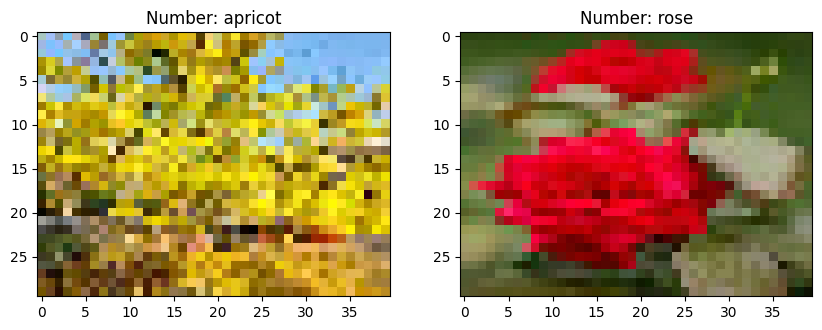

In [9]:
from matplotlib import pyplot as plt
# Plot the first two images of the training set
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("Number: {}".format(labels_flower[y_train[0]]))
plt.subplot(122)
plt.imshow(x_test[20], cmap='gray')
plt.title("Number: {}".format(labels_flower[y_test[20]]))
plt.show()

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU, Dropout
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='linear', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='linear', padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 38, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 38, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 19, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 19, 64)        0         
                                                        

In [12]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train, batch_size=12, epochs=100, verbose=1)

Epoch 1/100
92/92 [==============================] - 11s 11ms/step - loss: 1.1962 - accuracy: 0.5142
Epoch 2/100
92/92 [==============================] - 1s 8ms/step - loss: 0.7432 - accuracy: 0.6981
Epoch 3/100
92/92 [==============================] - 1s 7ms/step - loss: 0.5849 - accuracy: 0.7795
Epoch 4/100
92/92 [==============================] - 1s 8ms/step - loss: 0.5349 - accuracy: 0.7923
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 0.4935 - accuracy: 0.8005
Epoch 6/100
92/92 [==============================] - 1s 8ms/step - loss: 0.4191 - accuracy: 0.8435
Epoch 7/100
92/92 [==============================] - 1s 10ms/step - loss: 0.3859 - accuracy: 0.8554
Epoch 8/100
92/92 [==============================] - 1s 12ms/step - loss: 0.4095 - accuracy: 0.8536
Epoch 9/100
92/92 [==============================] - 1s 12ms/step - loss: 0.3576 - accuracy: 0.8582
Epoch 10/100
92/92 [==============================] - 1s 5ms/step - loss: 0.3085 - accuracy: 0.8884
Epoc

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

4/4 [==============================] - 0s 36ms/step - loss: 0.6927 - accuracy: 0.9098
test_acc: 0.9098360538482666
test_loss: 0.6926783323287964


In [15]:
model.save('/content/drive/My Drive/Colab Notebooks/flower.h5')

1/1 [==============================] - 0s 100ms/step
lotus


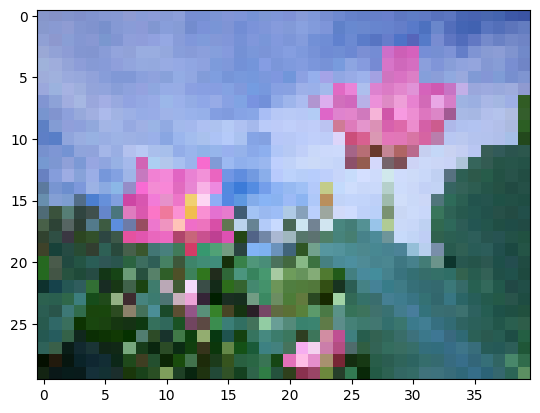

In [16]:

img = load_img('/content/drive/My Drive/Colab Notebooks/lotus2.jpg',target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 30, 40, 3)
img = img.astype('float32') / 255
result = labels_flower[np.argmax(model.predict(img))]
print(result)

1/1 [==============================] - 0s 20ms/step
daisy


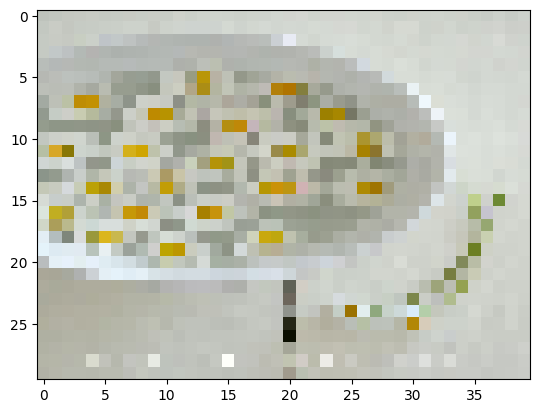

In [17]:
img1 = load_img('/content/drive/My Drive/Colab Notebooks/daisy.jpg',target_size=(30,40))
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1, 30, 40, 3)
img1 = img1.astype('float32') / 255
result1 = labels_flower[np.argmax(model.predict(img1))]
print(result1)

1/1 [==============================] - 0s 26ms/step
waterlily


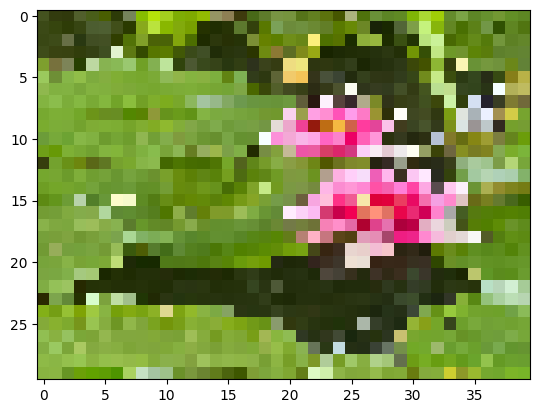

In [32]:
img2 = load_img('/content/drive/My Drive/Colab Notebooks/waterlily.jpg',target_size=(30,40))
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1, 30, 40, 3)
img2 = img2.astype('float32') / 255
result2 = labels_flower[np.argmax(model.predict(img2))]
print(result2)